# [IAPR][iapr]: Project


**Group ID:** 32

**Author 1 (350508):** Ziyi ZHAO  
**Author 2 (321657):** Yujie HE  
**Author 3 (337088):** Xufeng GAO  


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous card player that we will name Bartick Pruel is willing to improve his poker skills. To do so, he asked our lab to design a tool that will automatically detect the hands of the players around the table. 

---

## 1. Data

To achieve your task, you will be given images that look like this (without the overlay)


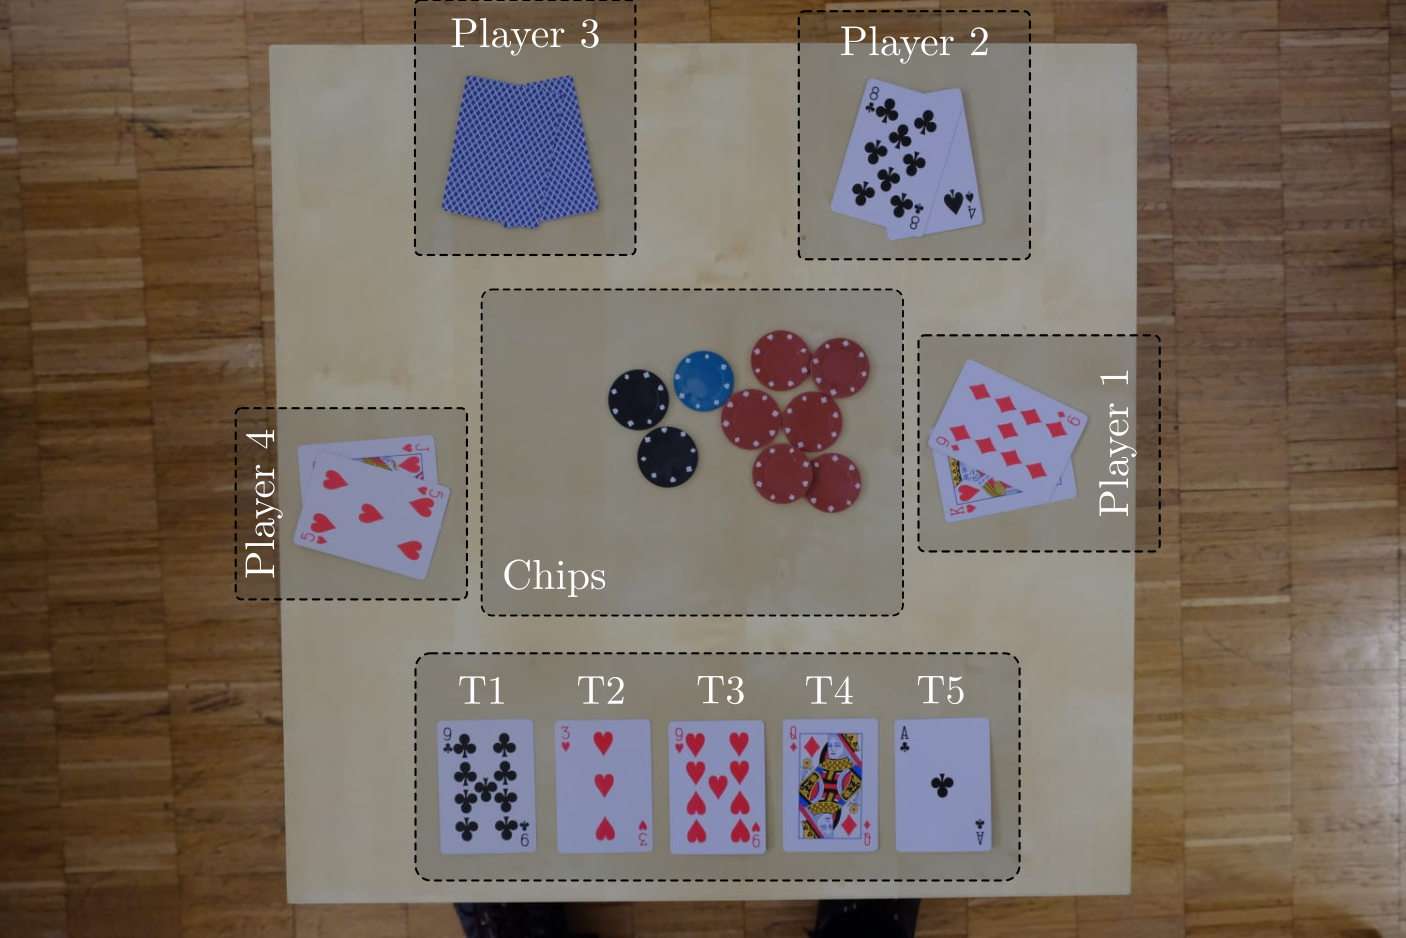

### 1.1. Table layout

The table is divided into 3 main parts:
* **Table cards (T1-T5)**: These cards are shared by every player. They are defined as the flop (T1-T3), the turn (T4) and the river (T5). The table cards are *always* visible.
* **Player cards (P11-P42)**: The cards played by each player (4 pairs). Each player *always* has 2 cards in hand. When a player is not playing, you can see the back of the cards (ex: player 3 here).
* **Chips**: The chips at the center of the table are named the pot.

### 1.2. Cards & Chips

The cards deck are composed of 52 cards split into 4 different colors: (D)imanond, (H)eart, (S)pade, (C)lub. Each color is composed of 13 different cards: 2, 3, 4, 5, 6, 7, 8, 9, 10, (J)ack, (Q)ueen, (K)ing and (A)ce.

Th chips can be of 5 different colors: (r)ed, (g)reen, (b)lue, blac(k) or (w)hite.


### 1.3 Structure

You can download the data for the project here: [download data](https://drive.google.com/file/d/1d7rOe88kEK1CEaLvYgNZkxrtKImLVC9X/view)


---

## 2. Tasks


Your task is to predict the following parameters for a set of images.

* **T1** (str): String code of the first card of the flop (far left) 
* **T2** (str): String code of the second card of the flop
* **T3** (str): String code of the third card of the flop
* **T4** (str): String code of the turn
* **T5** (str): String code of the river


* **P11** (str or int): String code of player 1 card 1. Should be 0 if player 1 is not Playing.
* **P12** (str or int): String code of player 1 card 2. Should be 0 if player 1 is not Playing.
* **P21** (str or int): String code of player 2 card 1. Should be 0 if player 2 is not Playing.
* **P22** (str or int): String code of player 2 card 2. Should be 0 if player 2 is not Playing.
* **P31** (str or int): String code of player 3 card 1. Should be 0 if player 3 is not Playing.
* **P32** (str or int): String code of player 3 card 2. Should be 0 if player 3 is not Playing.
* **P41** (str or int): String code of player 4 card 1. Should be 0 if player 4 is not Playing.
* **P42** (str or int): String code of player 4 card 2. Should be 0 if player 5 is not Playing.


* **CR** (int): Number of (r)ed chips in the pot
* **CG** (int): Number of (g)reen chips in the pot
* **CB** (int): Number of (b)lue chips in the pot
* **CK** (int): Number of blac(k) chips in the pot
* **CW** (int): Number of (w)hite chips in the pot


The output is saved using the function **save_results** as presented below.

---





## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** with few images, but **no ground truth** (csv file).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_game** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---

In [1]:
# std
from typing import Union, List, Dict
from glob import glob
import warnings
warnings.filterwarnings("ignore")
import os,sys

# imported
import cv2 as cv
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
import pandas as pd
from termcolor import colored
from treys import Card

# custom
from utils import eval_listof_games , debug_listof_games, save_results , load_results, eval_listof_games_custom
from viz_utils import plotMultipleImages, vizCropProcedures
from preprocess_utils import cropTable, cropImgParts, PART_NAMES
from chip_utils import getChipRes
from card_utils import checkNoPlay, extractTableCard, getPlayerRes, checkPlaying, checkPlayingSplit
from utils import getGameDict

In [2]:
project_dir_path = os.path.dirname(os.path.realpath("__file__"))

## Final evaluation Code

In [3]:
data_sz = 28
mode = "train"

In [4]:
from test_process_image import process_image

In [5]:
# process_image('data/train/train_22.jpg', debug=False, verbose=False)

In [6]:
## load train size dataset
path_data = os.path.join(project_dir_path, "data", mode)
group_id = 32

In [7]:
## load train size dataset
train_size = np.loadtxt(os.path.join(path_data, "train_size.txt")).astype(int)
print("Size of trainset:\n\t{}".format(train_size))

# Load images from folder
game_results = {}

# Evaluate three images
games_id = [i for i in range(data_sz)]  # to evaluate images

for i in games_id :
    file = os.path.join(path_data, f"train_{str(i).zfill(2)}.jpg") # Fill the string with zeros until it is 2 characters long
    # open the image
    im = PIL.Image.open(file)
    # Process the image
    # results = process_image(image=im)
    results = process_image(file=file)
    # Append result to array
    game_results[i] = results

# Outputs prediction of game 0
print("Prediciton game:\n\t{}: {}".format(0, game_results[0]))

Size of trainset:
	28
Prediciton game:
	0: {'T1': '2C', 'T2': '6H', 'T3': '8D', 'T4': 'JC', 'T5': 'JS', 'P11': '2H', 'P12': '4S', 'P21': '0', 'P22': 'QC', 'P31': 'AD', 'P32': '5S', 'P41': '7H', 'P42': '8C', 'CR': 1, 'CG': 1, 'CB': 1, 'CK': 1, 'CW': 1}


In [8]:
# Saving results
file_results = save_results(results=game_results, groupid=group_id)

In [9]:
# Checking the results were loaded correctly
loaded_results = load_results(file_results)
print(loaded_results.keys())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27'])


# Evaluation and Debugging

In [10]:
# Read training data
game_labels = pd.read_csv('data/train/updated_train_labels.csv')
game_labels = game_labels.fillna('0')
# game_labels

In [11]:
# Evaluate
# eval_listof_games( game_results , game_labels , game_id = games_id)
avg_score, score_list = eval_listof_games_custom( game_results , game_labels , game_id = games_id)

Average SCORE =  0.8232600732600732


(-1.0, 28.0)

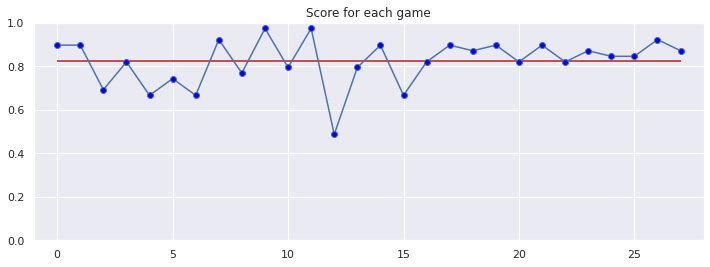

In [22]:
import seaborn as sns
sns.set_theme()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(
    score_list,
    marker='o', 
    markerfacecolor='blue', 
    markersize=6, 
    )
ax.set_title("Score for each game")
ax.hlines(y=avg_score, xmin=0, xmax=data_sz-1, linewidth=2, color='r')
ax.set_ylim([0.0, 1.0])
ax.set_xlim([-1, data_sz])